In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.style.use('dark_background')

### 7.4.1: Plateau Region Experiments

In [2]:
V = np.array([400, 500, 600, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880,900])  #Voltage (V)
Amp = np.array([0, 0, 0, 0, 280, 320, 400, 480, 600, 680, 800, 880, 1040,1160])  # -Amplitude (mV)
C = np.array([0, 0, 1, 0, 0, 1, 1, 85, 296, 300, 342, 336, 339, 318]) / 30  #Count rate ([counts]/30s)
print(len(V), len(Amp), len(C))

14 14 14


Text(0, 0.5, 'Counts / second')

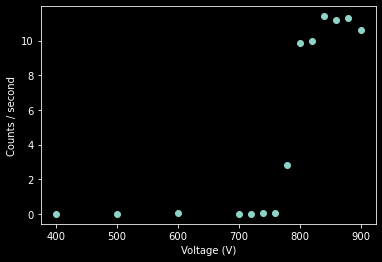

In [3]:
plt.scatter(V, C)
plt.xlabel("Voltage (V)")
plt.ylabel("Counts / second")

Text(0, 0.5, 'Pulse Amplitude (mV)')

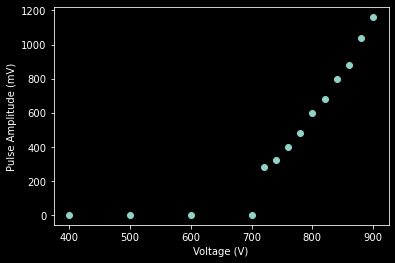

In [4]:
plt.scatter(V, Amp)
plt.xlabel("Voltage (V)")
plt.ylabel("Pulse Amplitude (mV)")

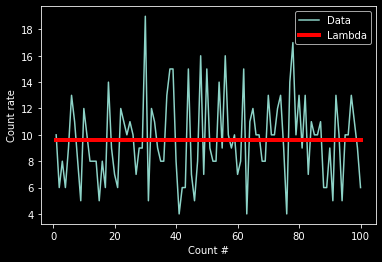

In [41]:
#1 second measurements
F = [
    10, 6, 8, 6, 9, 13, 11, 8, 5, 12, 10, 8, 8, 8, 5, 8, 6, 14, 9, 7, 6, 12,
    11, 10, 11, 10, 7, 9, 9, 19, 5, 12, 11, 9, 8, 8, 13, 15, 15, 8, 4, 6, 6,
    15, 7, 5, 8, 16, 7, 15, 9, 8, 8, 14, 9, 16, 10, 9, 10, 7, 8, 15, 4, 11, 12,
    10, 10, 8, 8, 13, 10, 10, 12, 13, 9, 4, 14, 17, 10, 13, 9, 13, 7, 11, 10,
    10, 11, 6, 6, 9, 5, 13, 10, 5, 10, 10, 13, 11, 9, 6
]
count = np.zeros(len(F))
for i in range(0, len(F)):
    count[i] = count[i - 1] + 1
plt.plot(count, F, label="Data")
plt.plot(count,np.full(len(count),lam),c='r',label="Lambda",lw=4)
plt.xlabel('Count #')
plt.ylabel('Count rate')
#plt.savefig("100 1s counts")
plt.legend()

Lambda = 9.63
Power_divergenceResult(statistic=2.6819990987737494e+62, pvalue=0.0)


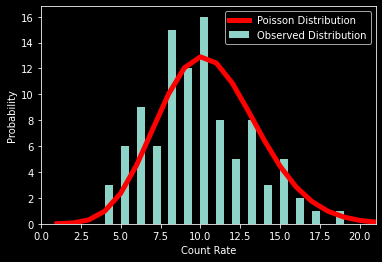

In [30]:
#Poisson distribution
lam = np.mean(F)
print("Lambda =",lam)
P = np.zeros(len(F))
for i in range(0, 100):
    P[i] = (np.exp(-lam) * ((lam**i) / np.math.factorial(i)))*100
plt.plot(count, P, linewidth=5, c='red',label="Poisson Distribution")
plt.xlabel("Count Rate")
plt.ylabel("Probability")
plt.xlim([0, 21])
chi_sq = stats.chisquare(F, P)
print(chi_sq)
#data
plt.hist(F, bins=30,label="Observed Distribution")
#plt.savefig('Poisson distribution vs Observed Distribution')
plt.legend()

In [13]:
#7.4.4
V_t = 480  #mV
V_p = 960  #mV
Voltage = 860  #V
tau = 500  #microseconds

#Number of counts / 5 seconds

#Source a (#15)
n_a = np.array([1210, 1224, 1150])/5
n_a_avg = np.mean(n_a)

#Sources a and b together
n_ab = np.array([2112, 2070, 2128])/5
n_ab_avg = np.mean(n_ab)

#Source b (#16)
n_b = np.array([1202, 1246, 1169])/5
n_b_avg = np.mean(n_b)

## 2-9: 7.5 Absorbtion of gamma rays by lead

#### 2-14

In [8]:
b = 10000  #area of big lead plates (mm^2)
s = 5625  #area of small lead plates (mm^2)
rho = 0.01136  #density of lead (g/mm^2)

#absorber thickness: rho*x = mass/area
mass_small = np.array([
    115, 114, 59, 112, 118, 112, 56, 112, 59, 114, 115, 57, 56, 59, 58, 112,
    112
])  #mass of small lead plates (grams)
mass_big = np.array([94, 94, 199, 95, 97,
                     198])  #masses of big lead plates (grams)

thickness_small = mass_small / s  #[mass]/area
thickness_big = mass_big / b  #[mass]/area
thickness_combined = np.concatenate((thickness_small, thickness_big))
mass_combined = np.concatenate((mass_small, mass_big))
thickness_total = (np.sum(thickness_combined)) / rho
print("Masses of lead plates in order (bottom to top):", mass_combined)
print("Total absorber thickness =", thickness_total, "mm")
print("Total number of plates = ", len(mass_combined))

Masses of lead plates in order (bottom to top): [115 114  59 112 118 112  56 112  59 114 115  57  56  59  58 112 112  94
  94 199  95  97 198]
Total absorber thickness = 30.93994522691706 mm
Total number of plates =  23


In [9]:
#measurement: m = [counts, time(s)]
#Intensity: I = counts/time(s) = m[0]/m[1]
#Thickness t(mm) = mass/area/density
#measuring the time it takes to reach 1200 counts for each thickness
#we adjust the thickness by removing plates off the top of the stack
#--> thickness_combined[:-n] where n is the cumulative number of plates that have been removed

b = 900 / 2400  #background intensity (counts/sec)

m0 = [1200, 15]
I0 = m0[0] / m0[1]  #intensity without shielding
t0 = (np.sum(thickness_combined[:-23])) / rho
print("Thickness 0 =", t0)
print("Intensity 0 =", I0)
print("")

m1 = [1200, 2243]
I1 = m1[0] / m1[1]
t1 = (np.sum(thickness_combined[:])) / rho
print("Thickness 1 =", t1)
print("Intensity 1 =", I1)
print("")

m2 = [1200, 1913]
I2 = m2[0] / m2[1]
t2 = (np.sum(thickness_combined[:-4])) / rho
print("Thickness 2 =", t2)
print("Intensity 2 =", I2)
print("")

m3 = [1200, 1422]
I3 = m3[0] / m3[1]
t3 = (np.sum(thickness_combined[:-8])) / rho
print("Thickness 3 =", t3)
print("Intensity 3 =", I3)
print("")

m4 = [1200, 1031]
I4 = m4[0] / m4[1]
t4 = (np.sum(thickness_combined[:-13])) / rho
print("Thickness 4 =", t4)
print("Intensity 4 =", I4)
print("")

m5 = [1200, 709]
I5 = m5[0] / m5[1]
t5 = (np.sum(thickness_combined[:-16])) / rho
print("Thickness 5 =", t5)
print("Intensity 5 =", I5)
print("")

m6 = [1200, 498]
I6 = m6[0] / m6[1]
t6 = (np.sum(thickness_combined[:-19])) / rho
print("Thickness 6 =", t6)
print("Intensity 6 =", I6)
print("")

m7 = [1200, 327]
I7 = m7[0] / m7[1]
t7 = (np.sum(thickness_combined[:-21])) / rho
print("Thickness 7 =", t7)
print("Intensity 7 =", I7)
print("")

Thickness 0 = 0.0
Intensity 0 = 80.0

Thickness 1 = 30.93994522691706
Intensity 1 = 0.5349977708426215

Thickness 2 = 25.755086071987485
Intensity 2 = 0.6272869837950863

Thickness 3 = 20.59467918622848
Intensity 3 = 0.8438818565400844

Thickness 4 = 15.195618153364633
Intensity 4 = 1.1639185257032008

Thickness 5 = 10.735524256651017
Intensity 5 = 1.692524682651622

Thickness 6 = 6.259780907668231
Intensity 6 = 2.4096385542168677

Thickness 7 = 3.583724569640063
Intensity 7 = 3.669724770642202



In [10]:
counts_combined = np.array(
    [m0[0], m1[0], m2[0], m3[0], m4[0], m5[0], m6[0], m7[0]])
time_combined = np.array(
    [m0[1], m1[1], m2[1], m3[1], m4[1], m5[1], m6[1], m7[1]])
thickness_combined = np.array([t0, t1, t2, t3, t4, t5, t6, t7])
intensity_combined = counts_combined / time_combined

In [11]:
sig_I = ((counts_combined[1:])**0.5) / time_combined[1:]
sig_b = 30/2400
dy_dI = 

SyntaxError: invalid syntax (<ipython-input-11-0dd19bd43a83>, line 3)

## Analysis and Stats

In [ ]:
I = np.array(intensity_combined[1:])
x = np.array(thickness_combined[1:])
plt.plot(x, I, 'o')
plt.xlabel("Thickness (mm)")
plt.ylabel("Observed Intensity (counts / s)")

In [ ]:
plt.scatter(x, np.log(I - b)) #take ln of both side to linearize data
B, A = np.polyfit(x, np.log(I - b), 1) #fit straight line to now linear data
print("A = ", A, "B = ", B)
X = np.linspace(2, 32, 100)
plt.plot(X, A + B * X, c='r')
mu = B

In [ ]:
plt.plot(x, I, 'o')
plt.plot(X, (np.log(I0-b)*np.exp(mu*X))+b)
print("Unshielded Intensity =",I0)
print("Background Intensity =",b)
plt.xlabel("Thickness (mm)")
plt.ylabel("Intensity (counts/second)")

In [ ]:
plt.plot(x, I, 'o')
plt.plot(x, (np.log(I0-b)*np.exp(mu*x))+b,'o',c='r')
print("Unshielded Intensity =",I0)
print("Background Intensity =",b)
plt.xlabel("Thickness (mm)")
plt.ylabel("Intensity (counts/second)")
chi_sq2 = stats.chisquare(I,(np.log(I0-b)*np.exp(mu*x))+b)
print(chi_sq2)